# Parameter Space Exploration

In [25]:
import numpy as np
import scipy
import itertools
import neurolib.utils.functions as func
import matplotlib.pyplot as plt
from neurolib.models.aln import ALNModel
import seaborn as sns
import pandas as pd

### Set parameter range
We get our paramter range from the model publication.

In [2]:
param_ranges = {
    'b': np.linspace(0, 60, 10),  # Spike-triggered adaptation current
    'a': np.linspace(0, 80, 10),  # Subthreshold adaptation conductance
}

### Define parameter sweep function

In [3]:
# Load structural connectivity matrices
weights_file = "data/sub-0001/sc/0001_1_Counts.csv"
length_file = "data/sub-0001/sc/0001_1_Lengths.csv"

weights = np.loadtxt(weights_file, delimiter=',')
length = np.loadtxt(length_file, delimiter=',')

def run_model_with_params(b, a):
    """
    Runs the ALNModel with the given parameters and returns key metrics.

    Parameters:
    - b (float): The parameter 'b' of the ALNModel.
    - a (float): The parameter 'a' of the ALNModel.

    Returns:
    - mean_exc_rate (float): The mean excitatory rate of the ALNModel.
    - mean_inh_rate (float): The mean inhibitory rate of the ALNModel.
    - mean_adaptation (float): The mean adaptation of the ALNModel.
    """

    model = ALNModel(Cmat=weights, Dmat=length)
    model.params['duration'] = 1000*60*0.5
    model.params['b'] = b
    model.params['a'] = a
    model.run()

    # Extract key metrics
    mean_exc_rate = np.mean(model['rates_exc'])
    mean_inh_rate = np.mean(model['rates_inh'])
    mean_adaptation = np.mean(model['IA'])

    return mean_exc_rate, mean_inh_rate, mean_adaptation

In [4]:
results = []

for b, a in itertools.product(param_ranges['b'], param_ranges['a']):
    mean_exc_rate, mean_inh_rate, mean_adaptation = run_model_with_params(b, a)
    results.append([b, a, mean_exc_rate, mean_inh_rate, mean_adaptation])
    
results = np.array(results)

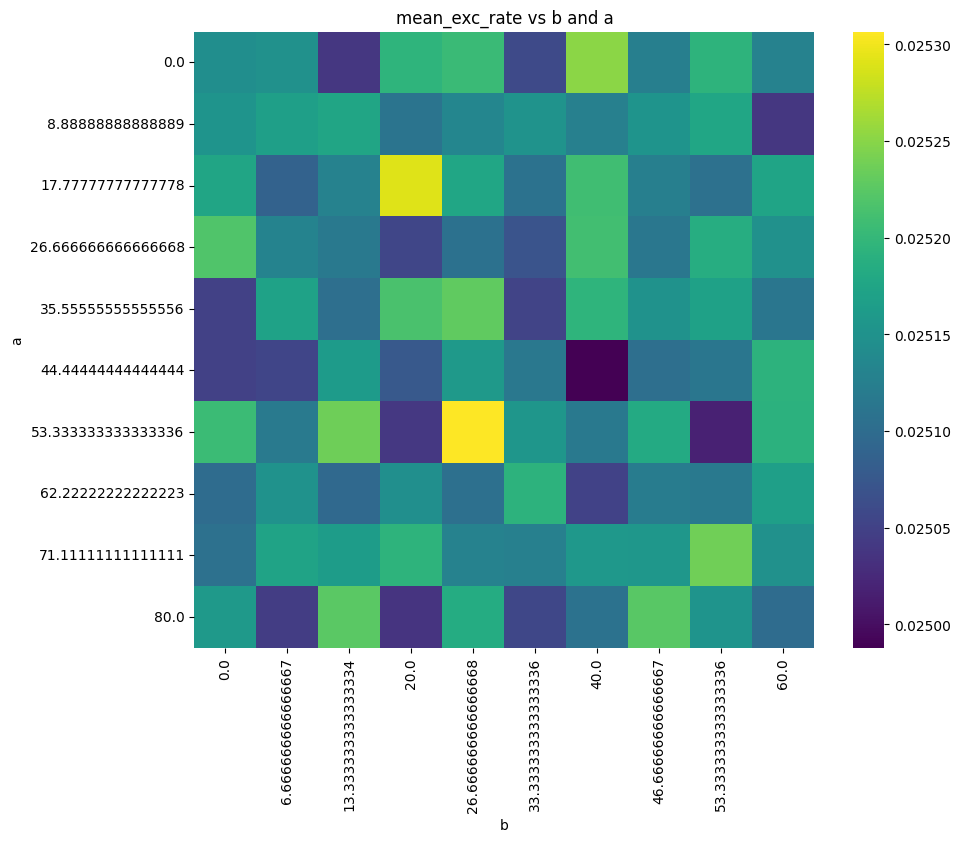

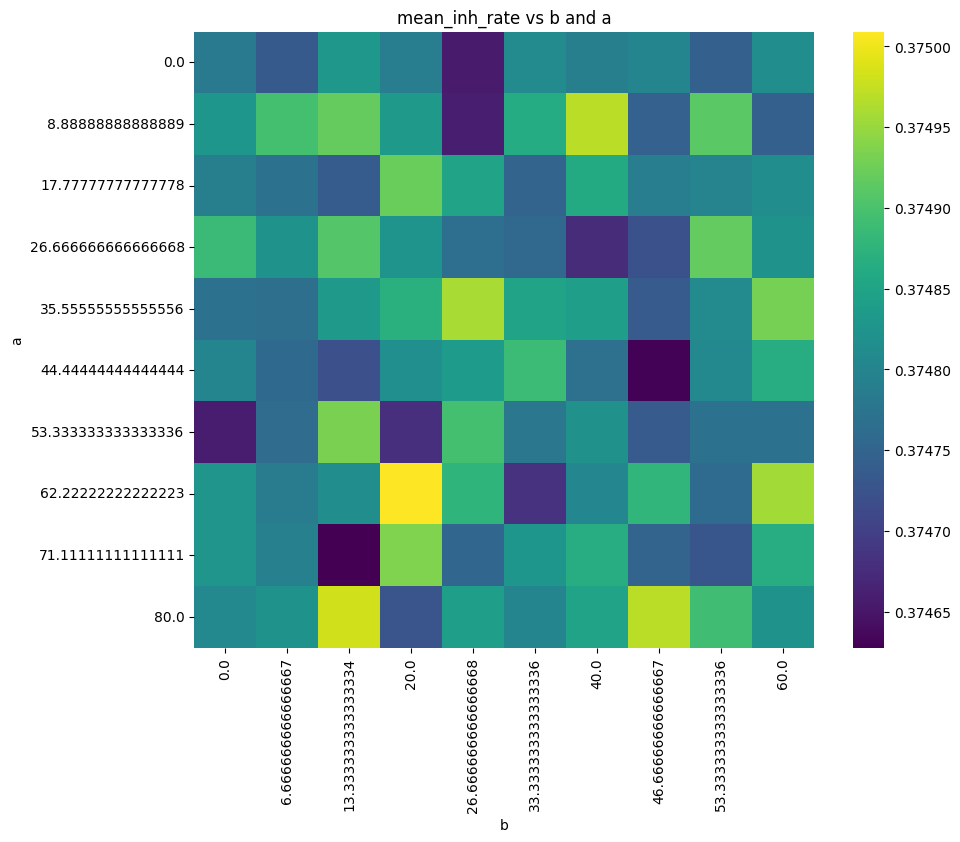

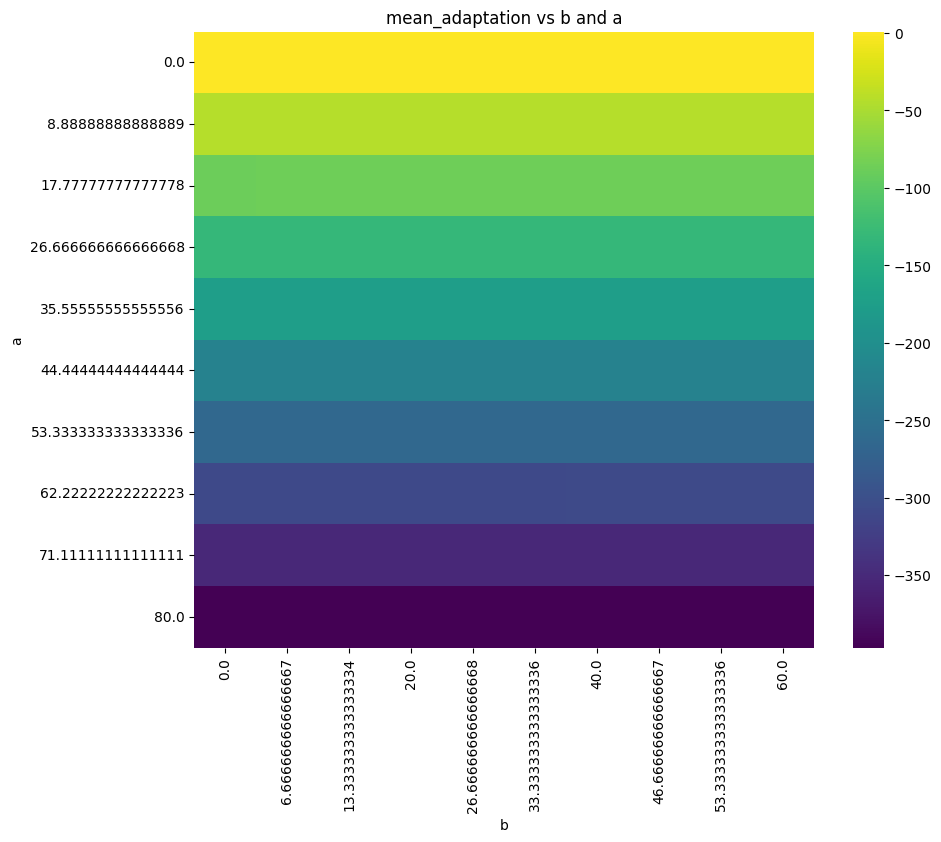

In [26]:
def plot_heatmap(data, x_param, y_param, metric, title):
    pivot_data = data.pivot(index=y_param, columns=x_param, values=metric)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_data, cmap='viridis', annot=False)
    plt.title(title)
    plt.xlabel(x_param)
    plt.ylabel(y_param)
    plt.show()

results_df = pd.DataFrame(results)
results_df.columns = ['b', 'a', 'mean_exc_rate', 'mean_inh_rate', 'mean_adaptation']


for metric in ['mean_exc_rate', 'mean_inh_rate', 'mean_adaptation']:
    plot_heatmap(results_df, 'b', 'a', metric, f'{metric} vs b and a')

In [16]:
results_df

print(results_df.head())

     b          a  mean_exc_rate  mean_inh_rate  mean_adaptation
0  0.0   0.000000       0.025144       0.374784         0.681733
1  0.0   8.888889       0.025153       0.374828       -43.442286
2  0.0  17.777778       0.025175       0.374790       -87.618770
3  0.0  26.666667       0.025219       0.374886      -131.812023
4  0.0  35.555556       0.025050       0.374771      -175.883160
